In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import random
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation, GlobalMaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS CBI\\anaconda3\\Lib\\site-packages\\~ensorflow\\python\\platform\\_pywrap_tf2.pyd'
Consider using the `--user` option or check the permissions.



  Using cached protobuf-5.26.1-cp39-cp39-win_amd64.whl (420 kB)
     ---------------------------------------- 1.7/1.7 MB 5.5 MB/s eta 0:00:00
  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.15.0
    Uninstalling tensorflow-intel-2.15.0:
      Successfully uninstalled tensorflow-intel-2.15.0


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install split-folders


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import splitfolders

In [3]:
splitfolders.ratio(r"C:/Users/SivaRanjan.s/OneDrive/Desktop/num", output="output",
    seed=1337, ratio=(.75, .2, .05), group_prefix=None, move=False)

Copying files: 350 files [00:00, 567.88 files/s]


In [4]:
data_dir = pathlib.Path('output/')
train_dir = 'output/train'
val_dir = 'output/val'
test_dir = 'output/test'

In [5]:
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['test' 'train' 'val']


In [6]:
for dirpath, dirnames, filenames in os.walk('output'):
  print(f"{len(dirnames)} folder and {len(filenames)} images in {dirpath}")

3 folder and 0 images in output
35 folder and 0 images in output\test
0 folder and 1 images in output\test\0
0 folder and 1 images in output\test\1
0 folder and 1 images in output\test\2
0 folder and 1 images in output\test\3
0 folder and 1 images in output\test\4
0 folder and 1 images in output\test\5
0 folder and 1 images in output\test\6
0 folder and 1 images in output\test\7
0 folder and 1 images in output\test\8
0 folder and 1 images in output\test\9
0 folder and 1 images in output\test\A
0 folder and 1 images in output\test\B
0 folder and 1 images in output\test\C
0 folder and 1 images in output\test\D
0 folder and 1 images in output\test\E
0 folder and 1 images in output\test\F
0 folder and 1 images in output\test\G
0 folder and 1 images in output\test\H
0 folder and 1 images in output\test\I
0 folder and 1 images in output\test\J
0 folder and 1 images in output\test\K
0 folder and 1 images in output\test\L
0 folder and 1 images in output\test\M
0 folder and 1 images in output\t

In [7]:
# Sets the global random seed.
tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [8]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

Found 245 images belonging to 35 classes.
Found 70 images belonging to 35 classes.
Found 35 images belonging to 35 classes.


In [9]:
train_data.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [10]:
train_y=train_data.classes
val_y=valid_data.classes
test_y=test_data.classes

In [11]:
print("train_y.shape: ", train_y.shape)
print("val_y.shape: ", val_y.shape)
print("test_y.shape: ", test_y.shape)

train_y.shape:  (245,)
val_y.shape:  (70,)
test_y.shape:  (35,)


In [12]:
base_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3),
                                                        include_top=False,
                                                        weights='imagenet')
base_model.trainable = False

In [13]:
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(35)
softmax = Activation('softmax')

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = Dropout(0.25)(x)
x = global_average_layer(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = Model(inputs, outputs)

In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 35)                  │          35,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 35)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,073,379 (26.98 MB)

 Trainable params: 35,875 (140.14 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [15]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# train model
history = model.fit(train_data, epochs=25, validation_data=valid_data)

Epoch 1/25


C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.0527 - loss: 4.1515 - val_accuracy: 0.0000e+00 - val_loss: 3.6502
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.0685 - loss: 3.4841 - val_accuracy: 0.1714 - val_loss: 3.3881
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.2055 - loss: 3.1820 - val_accuracy: 0.2000 - val_loss: 3.1977
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.2478 - loss: 2.9132 - val_accuracy: 0.3286 - val_loss: 2.9093
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.3630 - loss: 2.6939 - val_accuracy: 0.5143 - val_loss: 2.6416
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.4773 - loss: 2.4853 - val_accuracy: 0.5857 - val_loss: 2.3676
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.6049 - loss: 2.2270 - val_accuracy: 0.6286 - val_loss: 2.0735
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6666 - loss: 2.0696 - val_accuracy: 0.7286 - val_loss: 1.8178
Epoch 9/25
4/4 

In [17]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

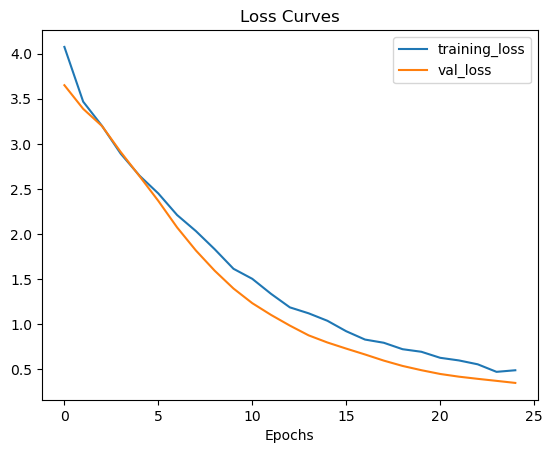

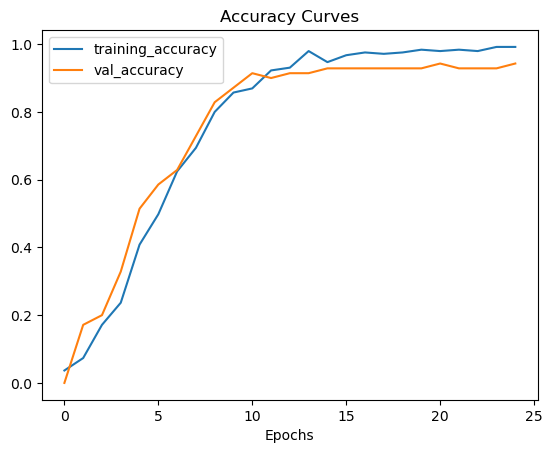

In [18]:
plot_loss_curves(history)

In [19]:
val_pred = model.predict(valid_data)
val_pred = val_pred.argmax(axis=1)
print(classification_report(val_pred, val_y))

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.50      0.25      0.33         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00 

C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


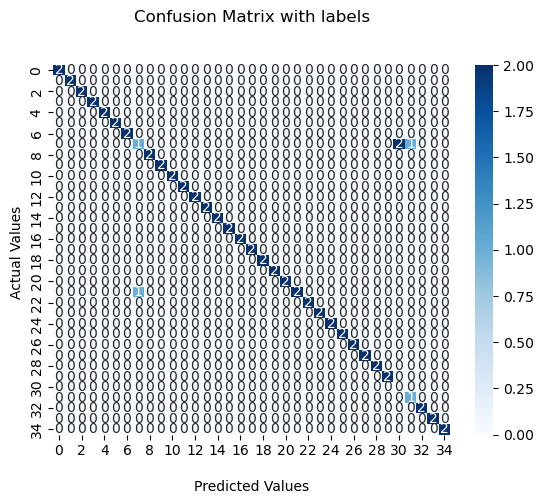

In [20]:
cfm_val = confusion_matrix(val_pred, val_y)
ax = sns.heatmap(cfm_val, annot=True, 
            cmap='Blues')

# Preparation for plotting confusion matrix
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
test_pred = model.predict(test_data)
test_pred = test_pred.argmax(axis=1)
print(classification_report(test_pred, test_y))

C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00  

C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


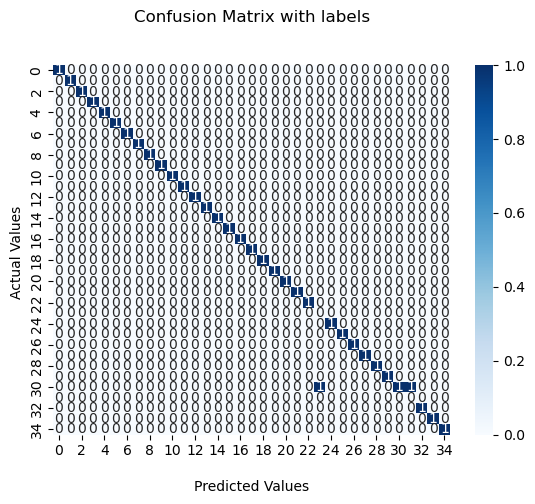

In [22]:
cfm_test = confusion_matrix(test_pred, test_y)
ax = sns.heatmap(cfm_test, annot=True, 
            cmap='Blues')

# Preparation for plotting confusion matrix
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
model.save('modeldensenet_121.keras')

In [110]:
pip install opencv-python

In [24]:
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('modeldensenet_121.keras')

image_path = "C:/Users/SivaRanjan.s/OneDrive/Desktop/testa.jpg"
image = image.load_img(image_path, target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1, 224, 224, 3)
label = model.predict(img)

class_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

predicted_class = np.argmax(label)
predicted_label = class_labels[predicted_class]
print("This is the predicted text",predicted_label)


C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 730 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
This is the predicted text 3


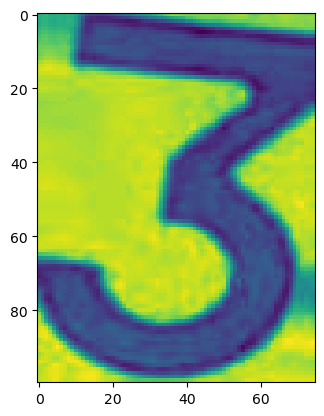

In [25]:
image = mpimg.imread(image_path)
plt.imshow(image)

1/2 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/stepWARNING:tensorflow:5 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000210535F9CA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


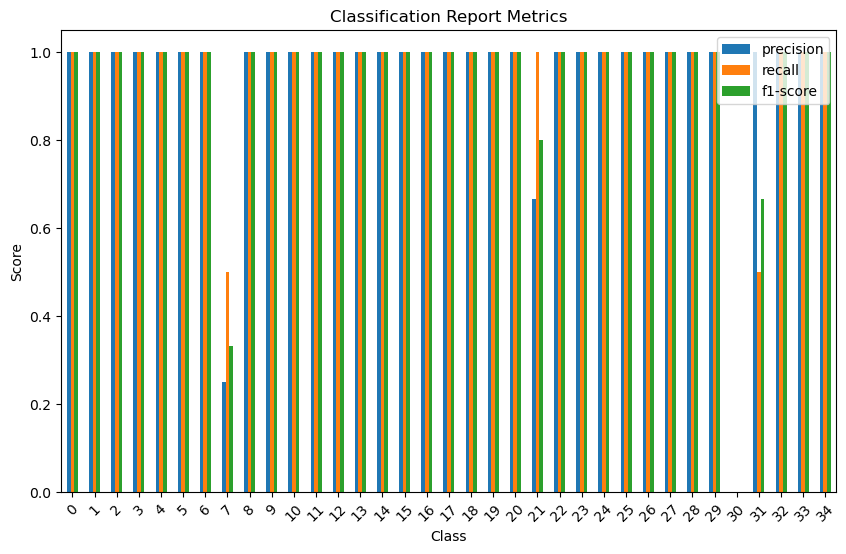

In [33]:
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.drop(['support'], axis=1)
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'])
    df.plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Report Metrics')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

val_pred = model.predict(valid_data)
val_pred_classes = np.argmax(val_pred, axis=1)
plot_classification_report(val_y, val_pred_classes)


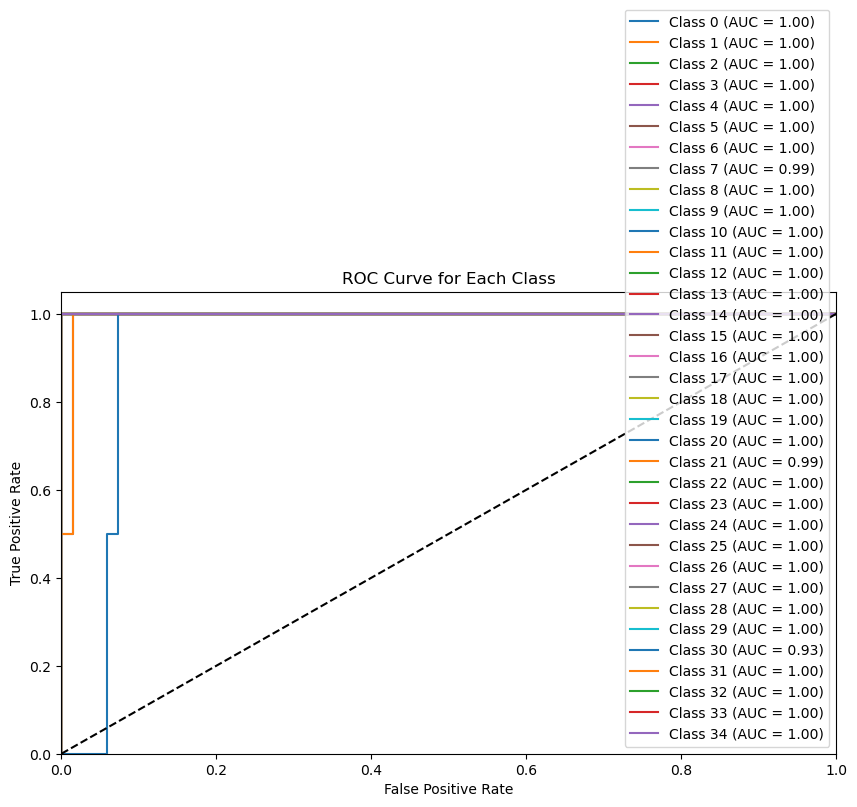

In [34]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_true))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 6))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(val_y, val_pred)


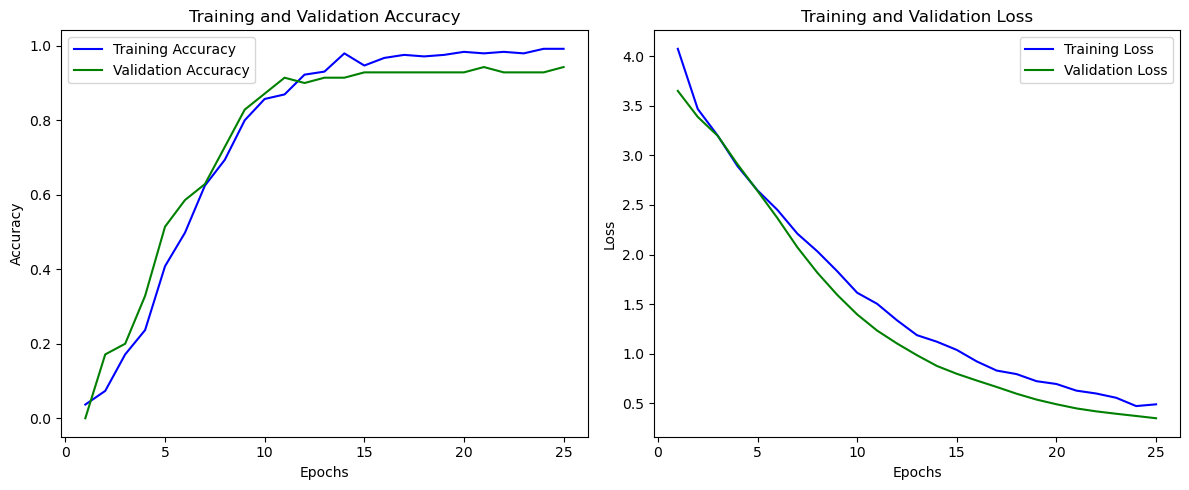

In [27]:
# Train the model and store the history
# history = model.fit(train_data, epochs=25, validation_data=valid_data)

# Extract training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have model predictions and actual labels
model_predictions = model.predict(test_data)
actual_labels = test_labels

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, model_predictions, average='weighted')
recall = recall_score(actual_labels, model_predictions, average='weighted')
f1 = f1_score(actual_labels, model_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [30]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=64,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             shuffle=False,
                                             seed=46)

test_labels = test_data.classes

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 35 images belonging to 35 classes.


C:\Users\SivaRanjan.s\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9429 - loss: 0.3953
Test Loss: 0.39530640840530396
Test Accuracy: 0.9428571462631226


In [36]:
predicted_labels = np.argmax(model_predictions, axis=1)
